In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from common import Fonts, Colors, add_twitter_handle, add_source

In [2]:
df = pd.read_csv("merged.csv")
df = df.replace("3", "S")
df = df.replace("4", "S")
df.head()

,team,1991,1995,1999,2003,2007,2011,2015,2019,2023,federation
0,Legend,X,X,X,X,X,X,X,X,X,Legend
1,Australia,NaN,G,G,G,Q,Q,Q,16,S,AFC
2,China,Q,S,2,Q,Q,NaN,Q,16,G,AFC
3,Chinese Taipei,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC
4,Japan,G,Q,G,G,G,1,2,16,Q,AFC


In [3]:
#results = ["G", "16", "Q", "4", "3", "2", "1"]
results = ["G", "16", "Q", "S", "2", "1"]
colors = plt.cm.plasma(np.linspace(0, 1, len(results)))
def color(result):
    if pd.isna(result):
        return "#F1F1F1"
    elif result == 'X':
        return Colors.WHITE
    elif result == '?':
        return Colors.LIGHT_GRAY
    else:
        return colors[results.index(result)]

<Figure size 4000x4000 with 0 Axes>

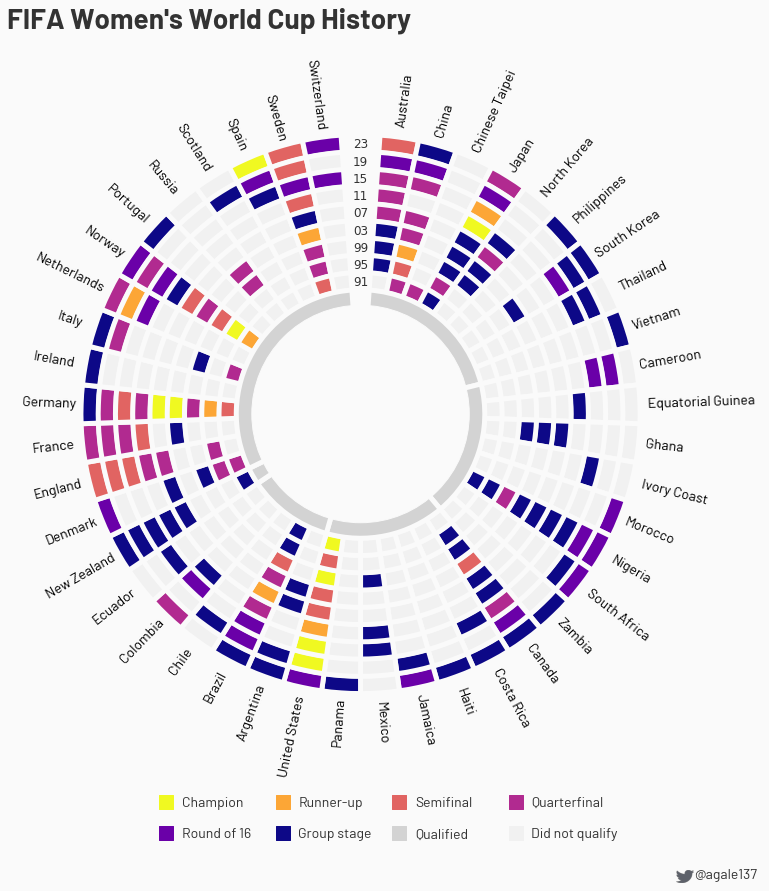

In [10]:
# Setup
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

label_r = 0.75
inner_r = 0.3
outer_r = 0.7


# Draw teams
for i, row in df.iterrows():
    if row["team"] == "Legend":
        continue
    angle = i / len(df.index) * 2 * math.pi
    x = math.sin(angle)
    y = math.cos(angle)
    r = label_r + len(row["team"]) / 2 * 0.015
    ax.text(
        x * r,
        y * r,
        row["team"],
        rotation=90 - angle / (2 * math.pi) * 360
        if i < len(df.index) / 2
        else 270 - angle / (2 * math.pi) * 360,
        ha="center",
        va="center",
        fontproperties=Fonts.BARLOW,
        fontsize=14,
    )

# Draw results
years = list(range(1991, 2024, 4))
years.reverse()
for j, year in enumerate(years):
    r = outer_r - (outer_r - inner_r) * j / len(years)
    ax.pie(
        [1] * len(df.index),
        radius=r + 0.02,
        colors=df[str(year)].apply(color),
        wedgeprops={"linewidth": 5, "edgecolor": Colors.WHITE},
        counterclock=False,
        startangle=90 + 0.5 * 360 / len(df.index),
    )
    ax.add_patch(patches.Circle((0, 0), r - 0.02, color=Colors.WHITE))

# Legend
legends = {
    "1": "Champion",
    "2": "Runner-up",
    "S": "Semifinal",
    "Q": "Quarterfinal",
    "16": "Round of 16",
    "G": "Group stage",
    "?": "Qualified",
    np.nan: "Did not qualify",
}
for i, key in enumerate(legends.keys()):
    x = -0.5 + 1.2 * (i % 4) / 4
    y = -1 - 0.08 * math.floor(i / 4)
    ax.scatter([x], [y], c=[color(key)], marker="s", s=200, clip_on=False)
    ax.text(
        x + 0.04,
        y - 0.002,
        legends[key],
        va="center",
        fontproperties=Fonts.BARLOW,
        fontsize=14,
        color=Colors.BLACK,
    )

# Draw year legend
for j, year in enumerate(years):
    r = outer_r - (outer_r - inner_r) * j / len(years)
    ax.text(
        0,
        r - 0.005,
        str(year)[2:],
        ha="center",
        va="center",
        # fontproperties=Fonts.BARLOW,
        fontsize=12,
        color=Colors.BLACK,
    )

# Draw federations
label_feds = False
feds = df.groupby("federation", sort=False).count()
pie = ax.pie(
    feds["team"],
    radius=inner_r + 0.02,
    colors=map(
        lambda x: Colors.WHITE if x == "Legend" else Colors.LIGHT_GRAY, feds.index
    ),
    wedgeprops={"linewidth": 5, "edgecolor": Colors.WHITE},
    counterclock=False,
    startangle=90 + 0.5 * 360 / len(df.index),
)
ax.add_patch(
    patches.Circle((0, 0), inner_r - (0 if label_feds else 0.02), color=Colors.WHITE)
)

# Federation labels
labels = pd.DataFrame(
    [
        ["AFC", 0.17, 0.2, 320],
        ["CAF", 0.245, -0.11, 65],
        ["CONCACAF", 0.02, -0.26, 5],
        ["CONMEBOL", -0.10, 0.23, 25],
        ["OFC", 0.25, 0.05, -80],
        ["UEFA", -0.27, -0.044, -80],
    ],
    columns=["label", "x", "y", "rotation"],
)
for i, row in labels.iterrows():
    if label_feds:
        ax.text(
            row["x"],
            row["y"],
            row["label"],
            ha="center",
            va="center",
            rotation=row["rotation"],
            fontproperties=Fonts.BARLOW,
            fontsize=14,
            color=Colors.BLACK,
        )

# Axes
ax.set_xlim([-outer_r, outer_r])
ax.set_ylim([-outer_r, outer_r])
ax.axis("off")

# Title
ax.set_title(
    "FIFA Women's World Cup History",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
    x=-0.15,
    y=1.2,
)

# Subtitle
#ax.text(
#    -0.91,
#    1.01,
#    "A total of 44 teams have competed in the Women's World Cup, 2023 featuring eight\ndebutants. Spain captured the title for the first time, in their third appearance.",
#    fontproperties=Fonts.BARLOW,
#    color=Colors.BLACK,
#    size=18,
#    ha="left",
#)

# Twitter logo and username
add_twitter_handle(fig, x=0.95, y=-0.15, fs=14, w=0.02)

# Save image
plt.savefig(
    "images/world_cup_history.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)